In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#!pip install rootpy
!pip install uproot3
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import uproot3
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-ml4pi/pi0.root
/kaggle/input/phys591000-ml4pi/piminus.root
/kaggle/input/phys591000-ml4pi/piplus.root


# Data Structure

In [12]:
pi0 = uproot3.open("../input/phys591000-ml4pi/pi0.root")
pi0 = pi0["ClusterTree"].pandas.df(flatten=False)

In [73]:
#for col in pi0.columns:
#    print(col)
print(pi0.columns)

Index(['runNumber', 'eventNumber', 'truthE', 'truthPt', 'truthEta', 'truthPhi',
       'clusterIndex', 'nCluster', 'clusterE', 'clusterECalib',
       ...
       'TileBar2[1][0]', 'TileBar2[1][1]', 'TileBar2[1][2]', 'TileBar2[1][3]',
       'duplicate_EMB1', 'duplicate_EMB2', 'duplicate_EMB3',
       'duplicate_TileBar0', 'duplicate_TileBar1', 'duplicate_TileBar2'],
      dtype='object', length=976)


In [34]:
pi0.head(10)

,runNumber,eventNumber,truthE,truthPt,truthEta,truthPhi,clusterIndex,nCluster,clusterE,clusterECalib,...,TileBar2[1][0],TileBar2[1][1],TileBar2[1][2],TileBar2[1][3],duplicate_EMB1,duplicate_EMB2,duplicate_EMB3,duplicate_TileBar0,duplicate_TileBar1,duplicate_TileBar2
entry,,,,,,,,,,,,,,,,,,,,,
0,284500,1763,532.180603,433.847717,0.661171,2.553774,0,1,522.347168,531.995789,...,0.0,0.0,0.0,0.0,0,0,5,0,0,0
1,284500,1500,7.640409,7.639162,-0.003771,-0.221088,0,1,6.733534,8.309240,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,284500,25,5.514576,5.512368,0.014204,-0.091146,0,2,2.788937,3.465582,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,284500,25,5.514576,5.512368,0.014204,-0.091146,1,2,1.246055,1.994231,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,284500,417,24.719658,21.158272,0.572335,-1.457298,0,1,23.665634,25.394232,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,284500,1708,1156.317261,1153.890015,0.064850,2.471513,0,1,1129.326904,1146.064575,...,0.0,0.0,0.0,0.0,0,0,6,0,0,0
6,284500,1179,549.707458,549.368225,0.035139,-0.117751,0,1,536.784119,542.090820,...,0.0,0.0,0.0,0.0,0,0,5,0,0,0
7,284500,1755,163.350052,146.622681,0.473241,2.429723,0,1,160.529922,163.405045,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
8,284500,1946,29.941057,26.996225,-0.462914,-1.687917,0,1,28.735607,29.832991,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [33]:
piminus = uproot3.open("../input/phys591000-ml4pi/piminus.root")
piminus.keys()
piminus = piminus["ClusterTree"].pandas.df(flatten=False)

In [35]:
piminus.head(10)

,runNumber,eventNumber,truthE,truthPt,truthEta,truthPhi,clusterIndex,nCluster,clusterE,clusterECalib,...,TileBar2[1][0],TileBar2[1][1],TileBar2[1][2],TileBar2[1][3],duplicate_EMB1,duplicate_EMB2,duplicate_EMB3,duplicate_TileBar0,duplicate_TileBar1,duplicate_TileBar2
entry,,,,,,,,,,,,,,,,,,,,,
0,284500,487,566.233582,418.616699,0.816894,-2.066652,0,1,1.145925,2.123011,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
1,284500,1239,5.661243,0.239010,3.857290,1.373374,0,1,0.473365,0.473365,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
2,284500,1603,4.399109,4.338198,-0.164316,0.330507,0,1,1.516320,3.046681,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
3,284500,1519,525.342896,492.473511,-0.363356,2.312536,0,3,286.216370,344.450409,...,0.0,0.000000,0.000000,0.000000,0,0,13,0,0,0
4,284500,1519,525.342896,492.473511,-0.363356,2.312536,1,3,112.498802,134.587555,...,0.0,0.000561,0.005525,0.001448,965148246,0,0,0,1,1
5,284500,1519,525.342896,492.473511,-0.363356,2.312536,2,3,0.544718,1.316859,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
6,284500,1510,1599.591309,1584.748413,-0.136759,-3.010827,0,4,858.022095,1051.031982,...,0.0,0.001677,0.004979,0.000000,0,0,0,0,0,0
7,284500,1510,1599.591309,1584.748413,-0.136759,-3.010827,1,4,233.844559,281.777008,...,0.0,0.040599,0.881839,0.009510,989892246,0,0,0,0,0
8,284500,1510,1599.591309,1584.748413,-0.136759,-3.010827,2,4,69.781120,73.962166,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0


In [32]:
piplus = uproot3.open("../input/phys591000-ml4pi/piplus.root")
piplus.keys()
piplus = piplus["ClusterTree"].pandas.df(flatten=False)

In [36]:
piplus.head(10)

,runNumber,eventNumber,truthE,truthPt,truthEta,truthPhi,clusterIndex,nCluster,clusterE,clusterECalib,...,TileBar2[1][0],TileBar2[1][1],TileBar2[1][2],TileBar2[1][3],duplicate_EMB1,duplicate_EMB2,duplicate_EMB3,duplicate_TileBar0,duplicate_TileBar1,duplicate_TileBar2
entry,,,,,,,,,,,,,,,,,,,,,
0,284500,273,1950.726807,1587.246094,0.664467,-2.114402,0,3,1706.589233,1847.573242,...,0.000104,0.000000,0.000000,0.00000,0,0,13,0,1,0
1,284500,273,1950.726807,1587.246094,0.664467,-2.114402,1,3,58.192909,78.681816,...,0.000000,0.000000,0.000000,0.00000,0,0,0,0,0,0
2,284500,273,1950.726807,1587.246094,0.664467,-2.114402,2,3,0.349190,0.769498,...,0.000000,0.000000,0.653864,0.00000,0,0,0,0,0,0
3,284500,375,18.619093,18.383078,0.159894,-1.081695,0,2,11.992596,21.729856,...,0.000000,0.000000,0.000000,0.00000,0,0,0,0,0,0
4,284500,375,18.619093,18.383078,0.159894,-1.081695,1,2,0.398268,0.827007,...,0.000000,0.000000,0.000000,0.00000,0,0,0,0,0,0
5,284500,779,1140.485474,1104.460083,0.254725,0.150986,0,2,1110.176758,1220.641479,...,0.000104,0.000768,0.005626,0.00036,963372909,0,0,1,2,1
6,284500,779,1140.485474,1104.460083,0.254725,0.150986,1,2,3.199462,4.221269,...,0.000000,0.000000,0.000000,0.00000,0,0,0,0,0,0
7,284500,1298,4.994724,4.891316,0.203328,2.687921,0,2,3.031781,5.610498,...,0.000000,0.000000,0.000000,0.00000,0,0,0,0,0,0
8,284500,1298,4.994724,4.891316,0.203328,2.687921,1,2,1.616328,3.095240,...,0.000000,0.000000,0.000000,0.00000,0,0,0,0,0,0


# Data visualization

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


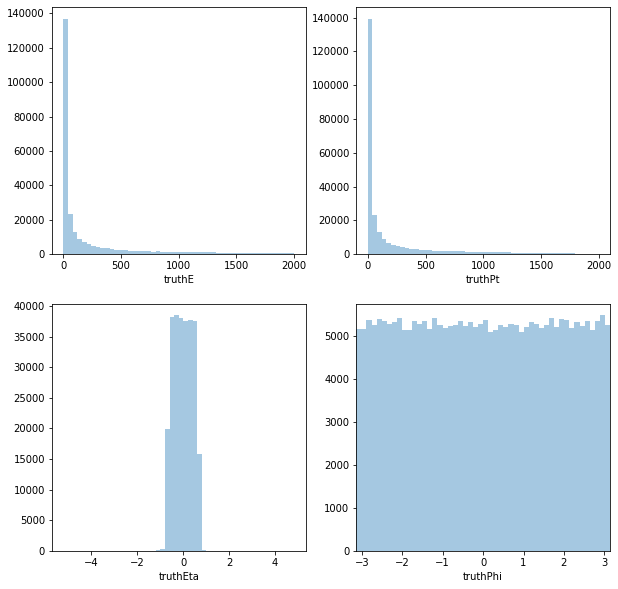

In [55]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (10,10))

for i, ax in zip(range(2,6), axes.flat):
    sns.distplot(a=pi0.iloc[:,i], kde=False, ax=ax, )
    min_tmp = np.min(pi0.iloc[:,i])
    max_tmp = np.max(pi0.iloc[:,i])
    plt.xlim(min_tmp,max_tmp)

plt.show()


## $\pi^0$

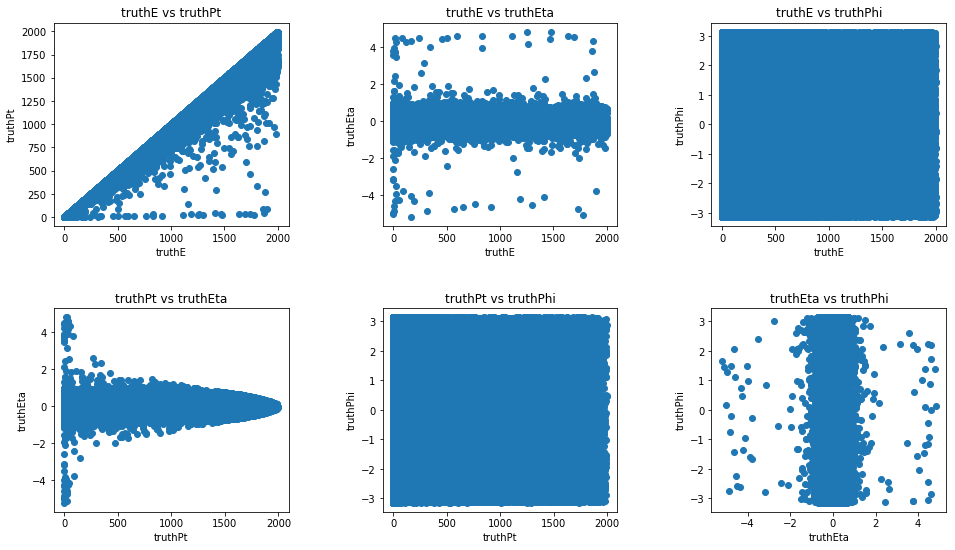

In [71]:
feature = ["truthE","truthPt","truthEta","truthPhi"]

n=0
plt.figure(figsize=(16,9))
for i in range(4):
    for j in range(i+1,4):
        n+=1
        plt.subplot(2,3,n)
        plt.scatter(pi0[feature[i]], pi0[feature[j]])
        plt.title(feature[i]+" vs "+feature[j])
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        plt.xlabel(feature[i])
        plt.ylabel(feature[j])
plt.show()

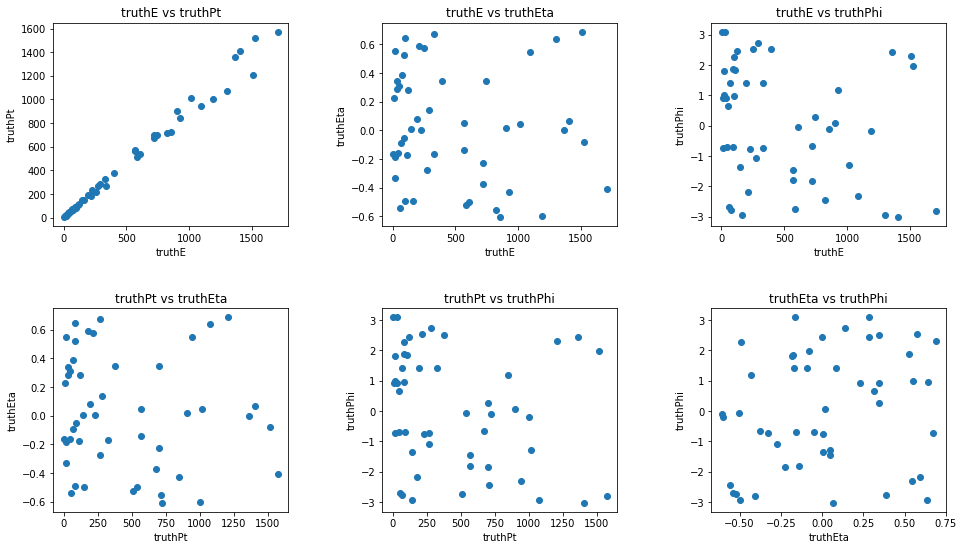

In [86]:
feature = ["truthE","truthPt","truthEta","truthPhi"]

n=0
plt.figure(figsize=(16,9))
for i in range(4):
    for j in range(i+1,4):
        n+=1
        plt.subplot(2,3,n)
        plt.scatter(pi0[pi0["clusterIndex"]==5][feature[i]],pi0[pi0["clusterIndex"]==5][feature[j]])
        plt.title(feature[i]+" vs "+feature[j])
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        plt.xlabel(feature[i])
        plt.ylabel(feature[j])
plt.show()

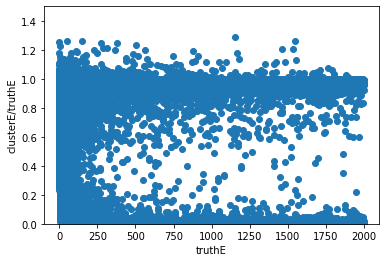

In [102]:
Emeasure = pi0.iloc[:,8]/pi0.iloc[:,2]
plt.scatter(pi0.iloc[:,2],Emeasure)
plt.ylim(0,1.5)
plt.xlabel("truthE")
plt.ylabel("clusterE/truthE")
plt.show()

## $\pi^+$

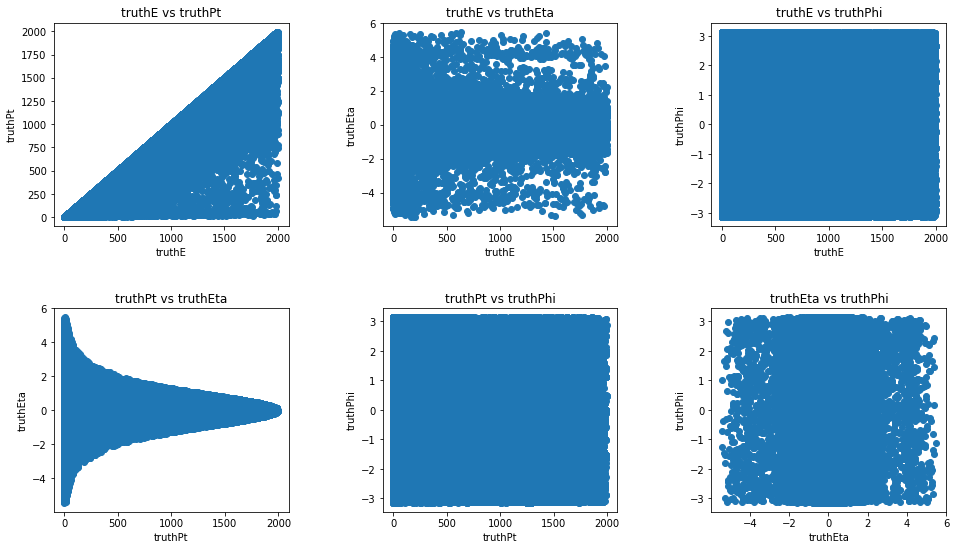

In [72]:
feature = ["truthE","truthPt","truthEta","truthPhi"]

n=0
plt.figure(figsize=(16,9))
for i in range(4):
    for j in range(i+1,4):
        n+=1
        plt.subplot(2,3,n)
        plt.scatter(piplus[feature[i]], piplus[feature[j]])
        plt.title(feature[i]+" vs "+feature[j])
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        plt.xlabel(feature[i])
        plt.ylabel(feature[j])
plt.show()

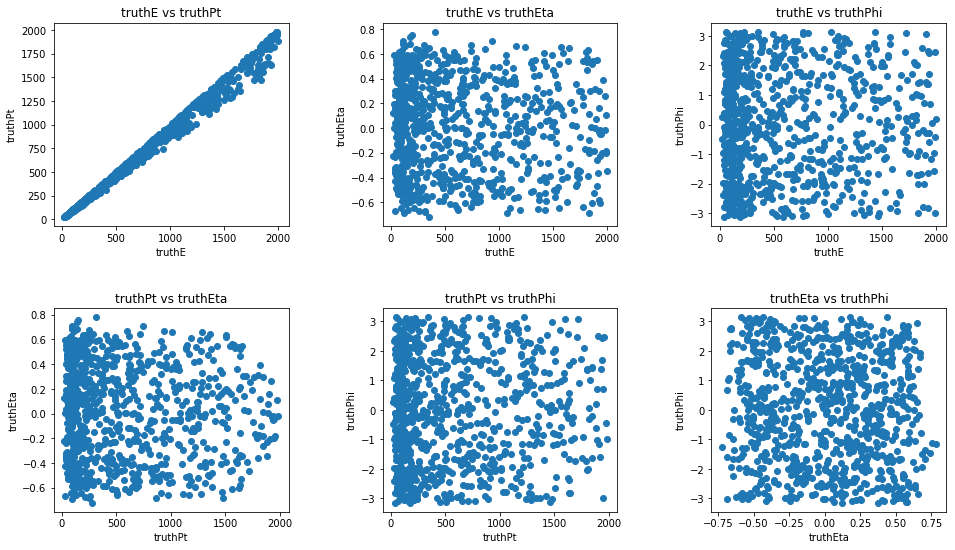

In [91]:
feature = ["truthE","truthPt","truthEta","truthPhi"]

n=0
plt.figure(figsize=(16,9))
for i in range(4):
    for j in range(i+1,4):
        n+=1
        plt.subplot(2,3,n)
        plt.scatter(piplus[piplus["clusterIndex"]==10][feature[i]],piplus[piplus["clusterIndex"]==10][feature[j]])
        plt.title(feature[i]+" vs "+feature[j])
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        plt.xlabel(feature[i])
        plt.ylabel(feature[j])
plt.show()

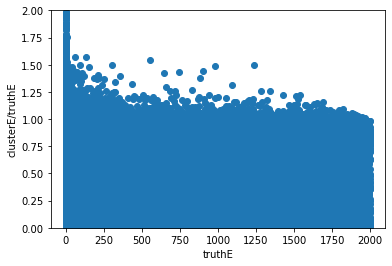

In [103]:
Emeasure = piplus.iloc[:,8]/piplus.iloc[:,2]
plt.scatter(piplus.iloc[:,2],Emeasure)
plt.xlabel("truthE")
plt.ylabel("clusterE/truthE")
plt.ylim(0,2)
plt.show()

## $\pi^-$

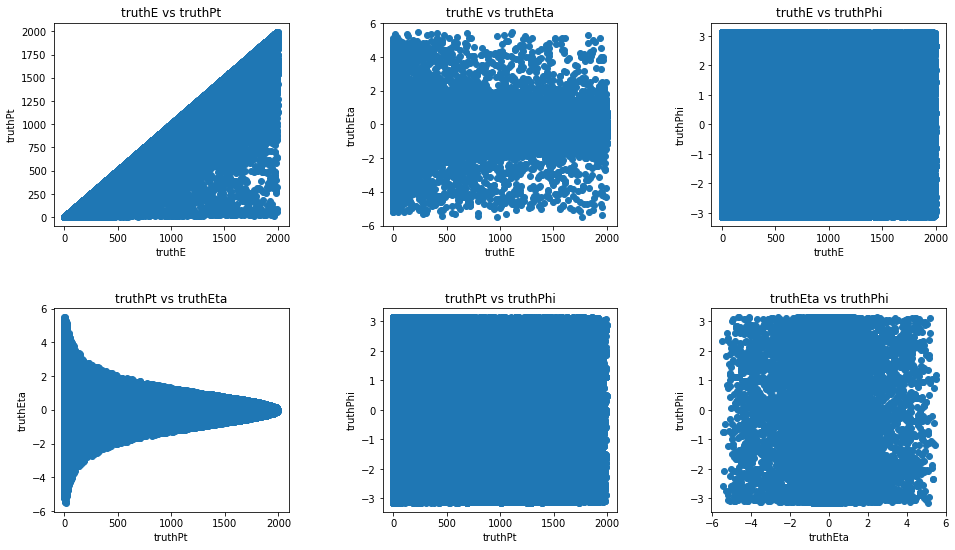

In [87]:
feature = ["truthE","truthPt","truthEta","truthPhi"]

n=0
plt.figure(figsize=(16,9))
for i in range(4):
    for j in range(i+1,4):
        n+=1
        plt.subplot(2,3,n)
        plt.scatter(piminus[feature[i]], piminus[feature[j]])
        plt.title(feature[i]+" vs "+feature[j])
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        plt.xlabel(feature[i])
        plt.ylabel(feature[j])
plt.show()

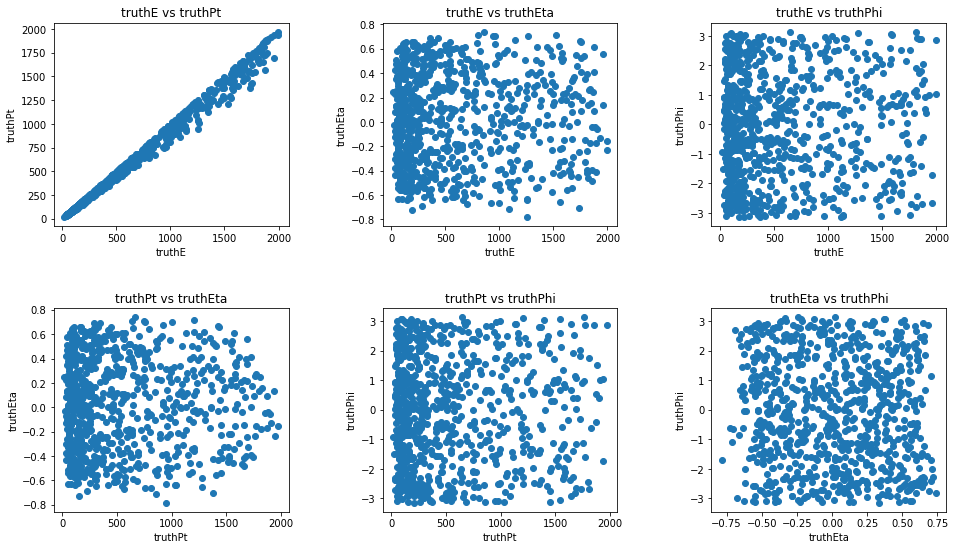

In [90]:
feature = ["truthE","truthPt","truthEta","truthPhi"]

n=0
plt.figure(figsize=(16,9))
for i in range(4):
    for j in range(i+1,4):
        n+=1
        plt.subplot(2,3,n)
        plt.scatter(piminus[piminus["clusterIndex"]==10][feature[i]],piminus[piminus["clusterIndex"]==10][feature[j]])
        plt.title(feature[i]+" vs "+feature[j])
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        plt.xlabel(feature[i])
        plt.ylabel(feature[j])
plt.show()

# Discussion

In this project, we have 3 different data: pi0, pi+, and pi-. Each data has so many features, we just choose energy, eta, phi of each detector cell. 

In part 2, we do the data visualization. First, we see the histgram of each features to find out the distribution of them, but we didn't get the information. Second, we plot the scatter graph to see the correlation of each features, and seperate the data by cluster index because the whole data looks to much data point. We find out E and Pt has linear relationship, while other figure show the low correlation between them. And finally, we do the truthE vs clusterE/truthE, to see whether we can get the same result as the paper. However, I'm not sure whether I do it right or wrong. 